In [1]:
import scanpy as sc
import anndata as ad
import numpy as np

## **Load data**

https://github.com/chanzuckerberg/single-cell-curation/blob/main/schema/7.0.0/schema.md 
requirements for all AnnData objects CELLxCELL

In [2]:
# emplacement pour elodie 
adata = sc.read_h5ad("/Users/elodiehusson/Desktop/subset_AD_PD_CTRL.h5ad")

# ajoutez vos emplacements ici du fichier, et juste mettez en commentaires les autres
# adata = sc.read_h5ad(".../.../subset_AD_PD_CTRL.h5ad")

/opt/anaconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1796: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


## **Metadatas de adata**

In [3]:
#Scanpy affiche un résumé structuré
adata

AnnData object with n_obs × n_vars = 60000 × 34176
    obs: 'Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'is_primary_data', 'AD_status', 'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status', 'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder', 'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry', 'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_name', 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_term_id', 'schema_reference', 'sche

In [4]:
# this is the sparse matrix
print("adata.X type is :",type(adata.X))
adata.X[:5, :5]

adata.X type is : <class 'scipy.sparse._csr.csr_matrix'>


<5x5 sparse matrix of type '<class 'numpy.float32'>'
	with 5 stored elements in Compressed Sparse Row format>

In [5]:
print("les dimensions de adata sont :",adata.shape)

les dimensions de adata sont : (60000, 34176)


In [6]:
print("les keys de adata.obs :",adata.obs.keys())
adata.obs.head()

les keys de adata.obs : Index(['Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype',
       'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id',
       'development_stage_ontology_term_id', 'sex_ontology_term_id',
       'donor_id', 'suspension_type', 'is_primary_data', 'AD_status',
       'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status',
       'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder',
       'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry',
       'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex',
       'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid'],
      dtype='object')


,Source,n_genes,n_counts,class,subclass,subtype,tissue_ontology_term_id,tissue_type,assay_ontology_term_id,cell_type_ontology_term_id,...,genetic_ancestry,disease_ontology_term_id,cell_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
barcodekey,,,,,,,,,,,,,,,,,,,,,
Donor_1386-2-ACGGTTAAGAGCATAT-1,R,5645,15585.0,EN,EN_L3_5_IT_2,EN_L3_5_IT_2_MET,UBERON:0009834,tissue,EFO:0009922,CL:4023040,...,African,MONDO:0001627 || MONDO:0004975,L2/3-6 intratelencephalic projecting glutamate...,10x 3' v3,dementia || Alzheimer disease,female,dorsolateral prefrontal cortex,unknown,80 year-old and over stage,0(Wln>Dl7^
Donor_1449-2-TTACGCCTCACCGGGT-1,R,9079,44013.0,EN,EN_L5_6_NP,EN_L5_6_NP,UBERON:0009834,tissue,EFO:0009922,CL:4030067,...,African,MONDO:0001627 || MONDO:0004975 || MONDO:0005015,L5/6 near-projecting glutamatergic neuron,10x 3' v3,dementia || Alzheimer disease || diabetes mell...,male,dorsolateral prefrontal cortex,unknown,80 year-old and over stage,BaX^=uu8Xq
Donor_604-2-AACAGGGAGTCGAGGT-1,R,2371,4435.0,IN,IN_VIP,IN_VIP_BCL11B,UBERON:0009834,tissue,EFO:0009922,CL:4023016,...,African,MONDO:0001627 || MONDO:0004975,VIP GABAergic cortical interneuron,10x 3' v3,dementia || Alzheimer disease,female,dorsolateral prefrontal cortex,unknown,80 year-old and over stage,zrOG~MydR8
Donor_785-1-TCGGATAGTGATGAAT-0,R,1451,2080.0,Oligo,Oligo,Oligo_OPALIN,UBERON:0009834,tissue,EFO:0009922,CL:0000128,...,unknown,MONDO:0001627 || MONDO:0004975,oligodendrocyte,10x 3' v3,dementia || Alzheimer disease,male,dorsolateral prefrontal cortex,unknown,67-year-old stage,YtYlAzGk*N
Donor_522-1-ACGTCCTAGTCATCGT-1,R,5460,18657.0,EN,EN_L2_3_IT,EN_L2_3_IT_PDGFD,UBERON:0009834,tissue,EFO:0009922,CL:4030059,...,African,MONDO:0001627 || MONDO:0004975 || MONDO:0005180,L2/3 intratelencephalic projecting glutamaterg...,10x 3' v3,dementia || Alzheimer disease || Parkinson dis...,female,dorsolateral prefrontal cortex,unknown,73-year-old stage,`a$3U<MDTv


In [7]:
# métadonnées gènes 
print("adata.var.keys :",adata.var.keys())
adata.var.head(2)

adata.var.keys : Index(['gene_name', 'n_cells', 'feature_is_filtered', 'feature_name',
       'feature_reference', 'feature_biotype', 'feature_length',
       'feature_type'],
      dtype='object')


,gene_name,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000000003,TSPAN6,256237,False,TSPAN6,NCBITaxon:9606,gene,2396,protein_coding
ENSG00000000005,TNMD,21369,False,TNMD,NCBITaxon:9606,gene,873,protein_coding


##### **UMAP : just to compare with our results**

In [8]:
# embeddings (UMAP, PCA...)
print("adata.obsm.keys :",adata.obsm.keys())
# informations diverses
print("adata.uns.keys :",adata.uns.keys())

adata.obsm.keys : KeysView(AxisArrays with keys: X_umap)
adata.uns.keys : dict_keys(['batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'subclass_colors', 'subtype_colors', 'title', 'uid'])


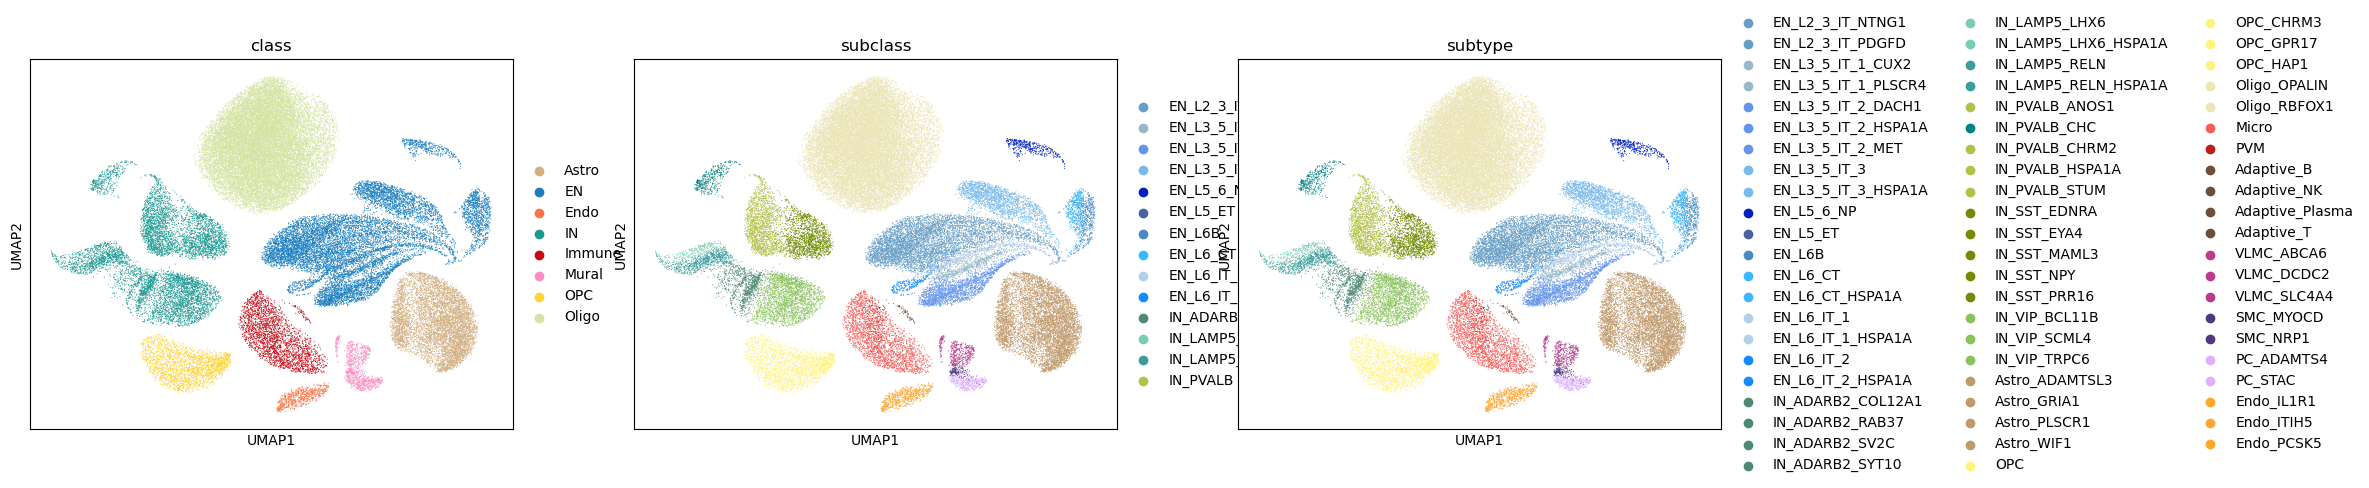

In [9]:
# sc.pl.umap(adata, color='cell_type')
# sc.pl.umap(adata, color='disease')
# sc.pl.umap(adata, color='AD_status')
# sc.pl.umap(adata, color='sex')
# sc.pl.umap(adata, color='subclass')
# sc.pl.umap(adata, color=['cell_type', 'subclass'])
sc.pl.umap(adata, color=['class', 'subclass', 'subtype'])

## **RNAseq pipeline**

### 1. Quality Check

before filtering of low quality cells : visualisation of QC metrics

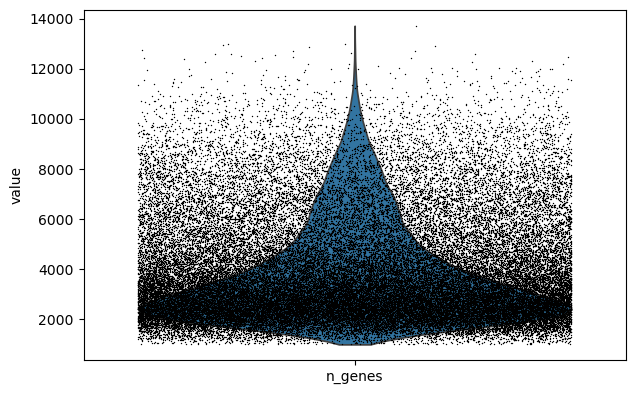

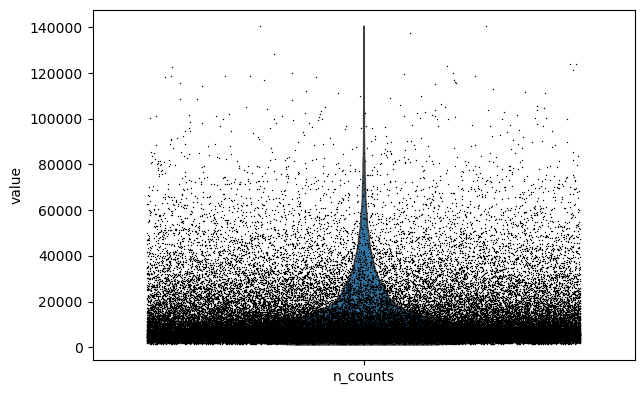

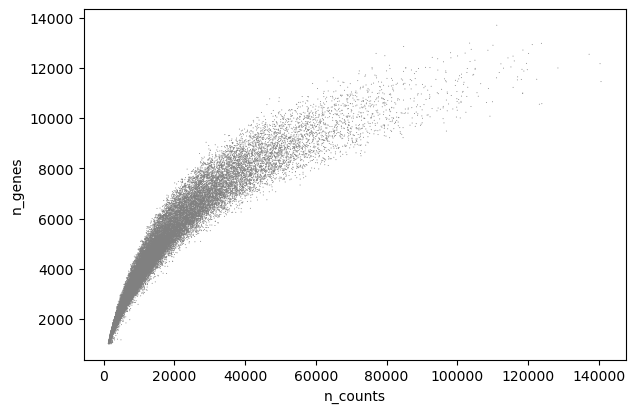

In [10]:
# 1. calculation of QC metrics and add them to adata.obs
sc.pp.calculate_qc_metrics(adata, inplace=True)

# 2. visualisation of QC metrics before filtering
sc.pl.violin(adata, 'n_genes', jitter=0.4) # violin plot of number of genes per cell
sc.pl.violin(adata, 'n_counts', jitter=0.4) # violin plot of number of counts per cell
sc.pl.scatter(adata, x='n_counts', y='n_genes') # scatter plot of number of genes vs number of counts

after filtering of low quality cells

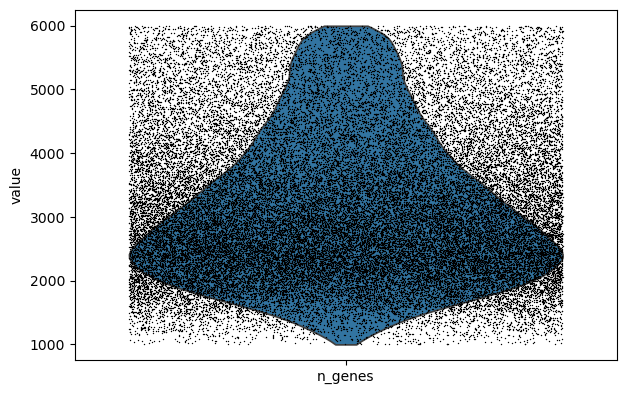

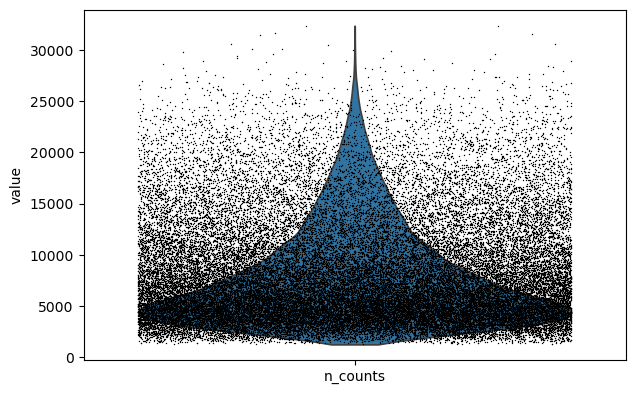

In [11]:
# 3. application of filters
adata = adata[adata.obs['n_genes'] < 6000, :] # cutoff seems to be 6000 genes
adata = adata[adata.obs['n_counts'] < 40000, :] # cutoff seems to be 40000 counts

# 4. visualisation of QC metrics after filtering
sc.pl.violin(adata, 'n_genes', jitter=0.4) # violin plot of number of genes per cell
sc.pl.violin(adata, 'n_counts', jitter=0.4) # violin plot of number of counts per cell

mitochondrial genes

In [12]:
# counts the number of mitochondrial genes
mito_genes = adata.var['gene_name'].str.startswith("MT-")
mito_genes.sum()

# indicate which genes are mitochondrial
adata.var["mt"] = mito_genes

# Calculate QC metrics including the percentage of mitochondrial genes and add them to adata.obs
sc.pp.calculate_qc_metrics(
    adata,
    qc_vars=["mt"],
    inplace=True
)

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_20262/878249317.py:6: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["mt"] = mito_genes
/opt/anaconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1796: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/opt/anaconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1796: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


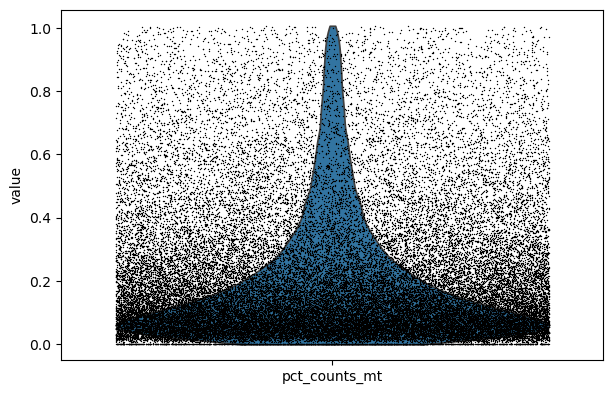

In [13]:
sc.pl.violin(
    adata,
    keys='pct_counts_mt',
    jitter=0.4,
    rotation=0,   
    stripplot=True,
    show=True
)

# data was already filtered on pct_counts_mt 
# it's weird because even before the filtering there was no cell with >10%. 
# They must have been filtered before
# I still keep the line just in case
adata = adata[adata.obs['pct_counts_mt'] < 10, :]


doublets recognition ?  
y'a pas de fonction comme dans seurat en python 
et en vrai vu qu'on a déjà choisi les cutoff plus tot, je pense que cette étape sert à rien 

je laisse le code, mais ca sert à rien je pense, et il marche pas et c'est super long pour le faire tourner

In [14]:
# import scrublet as scr
# import numpy as np

# # 1) Scrublet
# counts_matrix = adata.X.copy()
# scrub = scr.Scrublet(counts_matrix, expected_doublet_rate=0.06)

# doublet_scores, predicted_doublets = scrub.scrub_doublets()

# # 2) Ajouter au AnnData
# adata.obs['doublet_score'] = doublet_scores
# adata.obs['doublet_pred'] = predicted_doublets

# # 3) Visualiser distribution
# sc.pl.violin(adata, 'doublet_score', jitter=0.4)

# # 4) Pourcentage doublets
# adata.obs['doublet_pred'].value_counts(normalize=True)

### 2. Normalization

this part was already performed, so we are not doing it again

### 3. Highly Variable Genes

In [15]:
sc.pp.highly_variable_genes(adata, flavor='seurat_v3', n_top_genes=3000) 
adata = adata[:, adata.var['highly_variable']] # adata only keeps the 3000 highly variable genes

/opt/anaconda3/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:178: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}
/opt/anaconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1796: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


### 4. Scaling + PCA

In [ ]:
# scaling 
sc.pp.scale(adata, max_value=10)

# PCA
sc.pp.pca(adata, n_comps=50)
sc.pl.pca_variance_ratio(adata, n_pcs=50) # elbow plot to see how many PCs to keep

### 5. Clustering

In [ ]:

# --- Neighbors ---
sc.pp.neighbors(adata, n_pcs=30)


In [ ]:



# --- UMAP ---
sc.tl.umap(adata_sub)

# --- Clustering ---
sc.tl.leiden(adata_sub, resolution=0.6)

# --- Plot ---
sc.pl.umap(adata_sub, color=['leiden', 'cell_type', 'class', 'disease'])